In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#QUESTION-1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
x = np.array([0,1,2,3,4,5,6]).reshape(-1,1)
y = np.array([12,13.5,15,16.5,18,19.5,21])

In [4]:
model = LinearRegression().fit(x,y)

In [5]:
m = model.coef_[0]
b = model.intercept_

In [6]:
print(f"Linear Regression Equation : Y = {b:.2f}x +{m:.2f}")

Linear Regression Equation : Y = 12.00x +1.50


In [7]:
#QUESTION-2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [8]:
x = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y = np.array([50,55,60,68,80,85,89,92])

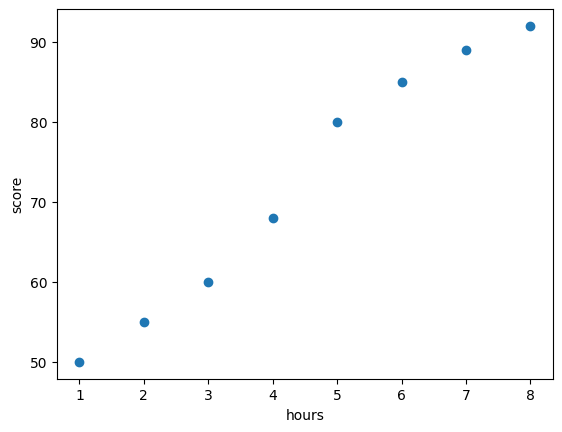

In [9]:
plt.scatter(x,y)
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [10]:
linear_model = LinearRegression().fit(x,y)
y_pred = linear_model.predict(x)

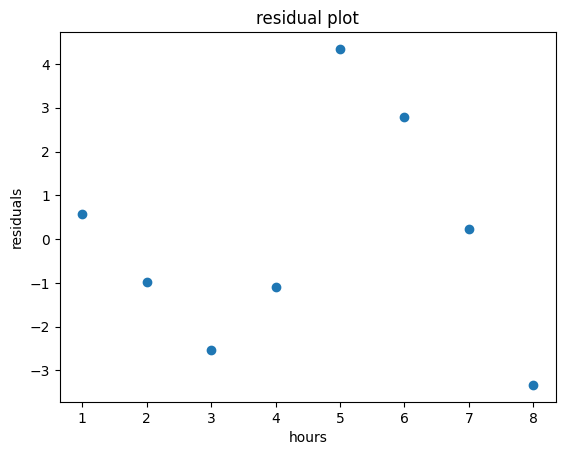

In [11]:
residuals = y-y_pred
plt.scatter(x,residuals)
plt.xlabel("hours")
plt.ylabel("residuals")
plt.title("residual plot")
plt.show()

In [12]:
r2_linear = r2_score(y,y_pred)
mse_linear = mean_squared_error(y,y_pred)
print(f"Linear Model r2 : {r2_linear:.4f}  ,  MSE : {mse_linear:.4f}")

Linear Model r2 : 0.9748  ,  MSE : 5.8408


In [13]:
#fit a polynomial model

In [14]:
poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(x)

In [15]:
poly_model = LinearRegression().fit(poly_x,y)
y_pred_poly = poly_model.predict(poly_x)

In [16]:
r2_poly = r2_score(y,y_pred_poly)
mse_poly = mean_squared_error(y,y_pred_poly)
print(f"Polynomial Model r2 : {r2_poly:.4f}  ,  MSE : {mse_poly:.4f}")

Polynomial Model r2 : 0.9792  ,  MSE : 4.8222


In [17]:
#calculate adjusted r2

In [18]:
n = len(y)
p_linear = x.shape[1]
adjusted_r2_linear = 1-(1-r2_linear)*(n-1)/(n-p_linear-1)

In [19]:
p_poly = poly_x.shape[1]-1
adjusted_r2_poly = 1-(1-r2_poly)*(n-1)/(n-p_poly-1)

In [24]:
#print adjusted r2 values
print(f"Adjusted R2 (Linear Model): {adjusted_r2_linear:.4f}, Adjusted R2(Polynomial Model): {adjusted_r2_poly:.4f}")

Adjusted R2 (Linear Model): 0.9706, Adjusted R2(Polynomial Model): 0.9709


In [25]:
if adjusted_r2_poly > adjusted_r2_linear:
    print("Polynomial model fits better based on Adjusted R^2.")
else:
    print("Linear model fits better based on Adjusted R^2.")


Polynomial model fits better based on Adjusted R^2.


In [26]:
# Bonus: Predict score for 9 hours of study
hours_studied = np.array([[9]])
predicted_linear = linear_model.predict(hours_studied)
predicted_poly = poly_model.predict(poly.fit_transform(hours_studied))

print(f"Predicted score with linear model for 9 hours: {predicted_linear[0]:.2f}")
print(f"Predicted score with polynomial model for 9 hours: {predicted_poly[0]:.2f}")

Predicted score with linear model for 9 hours: 101.89
Predicted score with polynomial model for 9 hours: 98.59


In [1]:
#Question4

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
df = pd.DataFrame(
    { "Income":[30000,32000,50000,60000,55000,35000,40000,65000],
      "Purchased":[0,0,1,1,1,0,0,1]
    })

In [5]:
X = df[["Income"]]
Y = df["Purchased"]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)

In [9]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuraccy : {accuracy:.4f}")

Accuraccy : 1.0000


In [17]:
coefficients = model.coef_[0]
intercept = model.intercept_
print(f"Coefficient for income: {coefficients[0]:.4f}")
print(f"Intercept: {intercept[0]:.4f}")

Coefficient for income: 0.0016
Intercept: -73.5167
